In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']

In [75]:
train = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, names=cols)

In [76]:
train.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [77]:
train['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

Hence, there are 800000 positive tweets and 800000 negative tweets. There are no neutral tweets in the dataset.


In [78]:
train['query_string'].value_counts()

NO_QUERY    1600000
Name: query_string, dtype: int64

In [79]:
train.drop(['id', 'date', 'query_string', 'user'], axis=1, inplace=True)

In [80]:
train.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [81]:
train[train['sentiment']==0].head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [82]:
train[train['sentiment']==4].head()

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


Hence, the first 800000 queries are negative. While the next 800000 queries are positive.

# Preparing the data

In [83]:
train['Preclean_Length'] = train['text'].apply(lambda x: len(x))

In [84]:
train.head()

,sentiment,text,Preclean_Length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


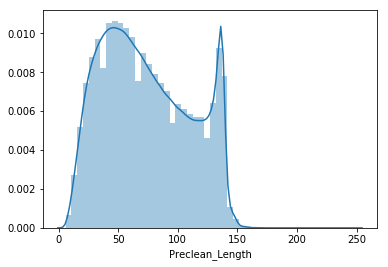

In [85]:
sns.distplot(train['Preclean_Length'])

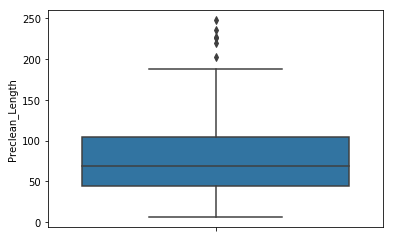

In [86]:
sns.boxplot(y='Preclean_Length', data=train)

In [87]:
train[train['Preclean_Length']>140]

,sentiment,text,Preclean_Length
213,0,Awwh babs... you look so sad underneith that s...,142
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141
1071,0,Used the term &quot;Fail Whale&quot; to a clie...,148


Hence, some tweets are more than 140 characters long. We need to clean the data.

# Cleaning the data

### HTML Decoding

In [88]:
train['text'][213]

"Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot;  O-: I like the look of the new transformer movie "

In [89]:
import html

In [90]:
tweet = html.unescape(train['text'][213])

In [91]:
tweet

'Awwh babs... you look so sad underneith that shop entrance of "Yesterday\'s Musik"  O-: I like the look of the new transformer movie '

### URL links

In [92]:
train['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

Some tweets contain URL links. We are going to remove these URLs for the purpose of sentiment analysis.

In [93]:
import re
re.sub('https?://[A-Za-z0-9./]+','',train['text'][0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

### Mentions

Some tweets contain mentioning other users. We are going to ignore mentions as well.

In [94]:
train['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [95]:
re.sub(r'@[A-Za-z0-9]+','', train['text'][0])

" http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

### Hashtag

In [96]:
train['text'][175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [97]:
re.sub("[^a-zA-Z]", " ", train['text'][175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

## Data Cleaning function:

In [98]:
from nltk.tokenize import TreebankWordTokenizer

In [99]:
token = TreebankWordTokenizer()

In [100]:
mentions = r'@[A-Za-z0-9]+'
url = 'https?://[A-Za-z0-9./]+'

In [101]:
word = "I am a  master "
lists = token.tokenize(word)
print(" ".join(lists).strip())

I am a master


In [102]:
def tweet_cleaning(text):
    text = html.unescape(text)
    text = re.sub(mentions, '', text)
    text = re.sub(url, '', text)
    #Removing characters except letters and lower casing the tweet
    text = re.sub("[^a-zA-Z]", " ", text).lower()
    #Removing unnecessary white spaces using tokenizer
    word_list = token.tokenize(text)
    text = " ".join(word_list).strip()
    return text

In [103]:
testing = train.text[:50]
for t in testing:
    print(tweet_cleaning(t))

awww that s a bummer you shoulda got david carr of third day to do it d
is upset that he can t update his facebook by texting it and might cry as a result school today also blah
i dived many times for the ball managed to save the rest go out of bounds
my whole body feels itchy and like its on fire
no it s not behaving at all i m mad why am i here because i can t see you all over there
not the whole crew
need a hug
hey long time no see yes rains a bit only a bit lol i m fine thanks how s you
k nope they didn t have it
que me muera
spring break in plain city it s snowing
i just re pierced my ears
i couldn t bear to watch it and i thought the ua loss was embarrassing
it it counts idk why i did either you never talk to me anymore
i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown
i wish i got to watch it with you i miss you and how was the premiere
hollis death scene will hurt me severely to watch on film wry is directors cut not out now
abo

In [104]:
train['text'] = train['text'].apply(lambda x: tweet_cleaning(x))

In [105]:
train.head()

,sentiment,text,Preclean_Length
0,0,awww that s a bummer you shoulda got david car...,115
1,0,is upset that he can t update his facebook by ...,111
2,0,i dived many times for the ball managed to sav...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,no it s not behaving at all i m mad why am i h...,111


In [107]:
train.drop(['Preclean_Length'], axis=1, inplace=True)

In [108]:
train.head()

,sentiment,text
0,0,awww that s a bummer you shoulda got david car...
1,0,is upset that he can t update his facebook by ...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no it s not behaving at all i m mad why am i h...


In [109]:
train.to_csv('clean_tweets.csv', encoding='utf-8')